In [7]:
import pandas
import seaborn as sns
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy
import os
sns.set_style('white')
sns.set_palette('Set2')
sns.set_context("paper", font_scale=1.8)

In [8]:
word_att_classification = pandas.read_csv('../tmp/18-12-12-14-46_batch_64_lstm_100_dropout_0.3-0.3_linear_word_0.7354_dev', delim_whitespace=True, names=['true', 'prediction'], usecols=[1, 2], engine='python')
no_att_classification = pandas.read_csv('../tmp/18-12-06-01-54_batch_64_lstm_150_dropout_0.5-0.5_NoAttention_0.7178_dev', delim_whitespace=True, names=['true', 'prediction'], usecols=[1, 2], engine='python')
context_att_classification = pandas.read_csv('../tmp/18-11-28-12-29_batch_64_lstm_150_dropout_0.5-0.5_sigmoid_0.7121_dev', delim_whitespace=True, names=['true', 'prediction'], usecols=[1, 2], engine='python')

def extract_component_label(full_label):
    """Given a full label, extracts the component classification label"""
    return full_label.lower()

word_att_classification['true_component'] = word_att_classification['true'].apply(extract_component_label)
word_att_classification['predicted_component'] = word_att_classification['prediction'].apply(extract_component_label)
word_att_classification.true_component.unique()

context_att_classification['true_component'] = context_att_classification['true'].apply(extract_component_label)
context_att_classification['predicted_component'] = context_att_classification['prediction'].apply(extract_component_label)
context_att_classification.true_component.unique()

no_att_classification['true_component'] = no_att_classification['true'].apply(extract_component_label)
no_att_classification['predicted_component'] = no_att_classification['prediction'].apply(extract_component_label)
no_att_classification.true_component.unique()

array(['o', 'claim', 'premise', 'majorclaim'], dtype=object)

In [9]:
print("Word attention\n")
print(sklearn.metrics.classification_report(word_att_classification.true_component, word_att_classification.predicted_component))
print("\n")

print("Context attention\n")
print(sklearn.metrics.classification_report(context_att_classification.true_component, context_att_classification.predicted_component))
print("\n")

print("No attention\n")
print(sklearn.metrics.classification_report(no_att_classification.true_component, no_att_classification.predicted_component))




Word attention

              precision    recall  f1-score   support

       claim       0.51      0.52      0.52      1873
  majorclaim       0.69      0.68      0.69       983
           o       0.89      0.87      0.88      4055
     premise       0.86      0.86      0.86      5747

   micro avg       0.80      0.80      0.80     12658
   macro avg       0.74      0.74      0.74     12658
weighted avg       0.80      0.80      0.80     12658



Context attention

              precision    recall  f1-score   support

       claim       0.46      0.49      0.47      1873
  majorclaim       0.68      0.63      0.66       983
           o       0.90      0.85      0.88      4055
     premise       0.83      0.85      0.84      5747

   micro avg       0.78      0.78      0.78     12658
   macro avg       0.72      0.71      0.71     12658
weighted avg       0.79      0.78      0.78     12658



No attention

              precision    recall  f1-score   support

       claim       0.4

Word attention

Observed Agreement: 80.15%


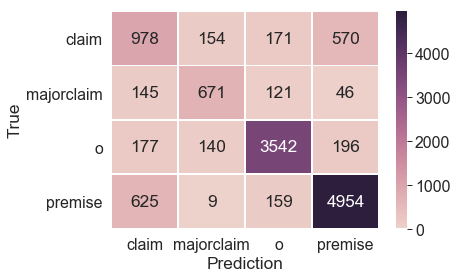

0.8014694264496761


Context attention

Observed Agreement: 78.24%


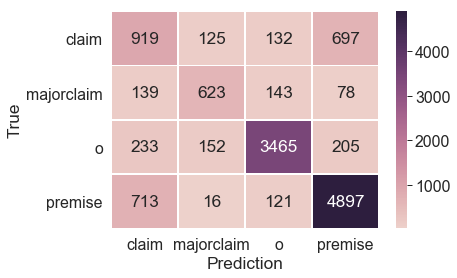

0.7824300837415074


No attention

Observed Agreement: 79.78%


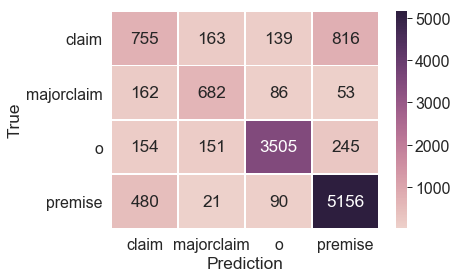

0.7977563596144731


In [10]:
def show_confusion_matrix(labels1, labels2, identifier1=None, identifier2=None):
    label_names = sorted(list(set(labels1)))
    matrix = metrics.confusion_matrix(labels1, labels2, labels=label_names)
    observed_agreement = numpy.trace(matrix) / float(numpy.sum(matrix)) * 100
    print('Observed Agreement: {0:.2f}%'.format(observed_agreement))
    colormap = plt.cm.cubehelix_r
    figure = sns.heatmap(matrix, annot=True, fmt="d", linewidths=.5,
                         xticklabels=label_names, yticklabels=label_names,
                         cmap=sns.cubehelix_palette(8,  as_cmap=True))
    if identifier1 is not None:
        figure.set(ylabel=identifier1)
    if identifier2 is not None:
        figure.set(xlabel=identifier2)
    plt.show()


print("Word attention\n")
show_confusion_matrix(word_att_classification.true_component, word_att_classification.predicted_component, 'True', 'Prediction')
print(sklearn.metrics.accuracy_score(word_att_classification.true_component, word_att_classification.predicted_component))
print("\n")

print("Context attention\n")
show_confusion_matrix(context_att_classification.true_component, context_att_classification.predicted_component, 'True', 'Prediction')
print(sklearn.metrics.accuracy_score(context_att_classification.true_component, context_att_classification.predicted_component))
print("\n")

print("No attention\n")
show_confusion_matrix(no_att_classification.true_component, no_att_classification.predicted_component, 'True', 'Prediction')
print(sklearn.metrics.accuracy_score(no_att_classification.true_component, no_att_classification.predicted_component))